In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


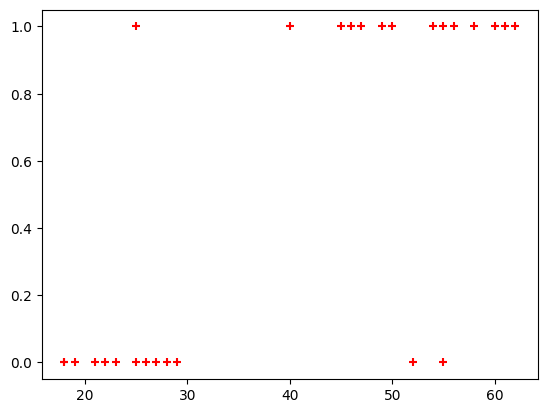

In [24]:
plt.scatter(df.age, df.bought_insurance, marker='+', color='red', label='Actual Data')

In [5]:
df.shape

(27, 2)

In [6]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,test_size=0.1)

In [10]:
x_test

,age
16,25
24,50
26,23


In [11]:
x_train

,age
7,60
15,55
2,47
18,19
22,40
17,58
23,45
21,26
12,27
14,49


In [12]:
from sklearn import linear_model

In [13]:
reg = linear_model.LogisticRegression()

In [14]:
reg.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [15]:
reg.predict(x_test)

array([0, 1, 0])

In [16]:
reg.score(x_test,y_test)

0.6666666666666666

In [17]:
reg.predict_proba(x_test)

array([[0.94148185, 0.05851815],
       [0.20278242, 0.79721758],
       [0.95729874, 0.04270126]])

In [18]:
reg.predict([[56]])

C:\Users\star\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [19]:
import joblib

In [20]:
joblib.dump(reg, 'logistic_regression_model')

['logistic_regression_model']

In [21]:
my_model = joblib.load('logistic_regression_model')

In [22]:
my_model.predict([[15]])

C:\Users\star\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

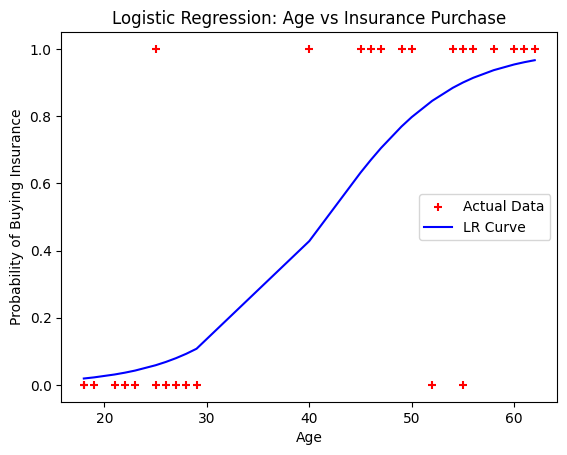

In [38]:
sorted_df = df.sort_values(by='age')

# Get predicted probabilities of class 1 (buying insurance)
probabilities = my_model.predict_proba(sorted_df[['age']])[:, 1]

# Plot
plt.xlabel('Age')
plt.ylabel('Probability of Buying Insurance')
plt.title('Logistic Regression: Age vs Insurance Purchase')

# Scatter actual values
plt.scatter(df.age, df.bought_insurance, marker='+', color='red', label='Actual Data')

# Plot the logistic regression curve
plt.plot(sorted_df.age, probabilities, color='blue', label='LR Curve')

plt.legend()
plt.show()